In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.core.display import Image, display
%matplotlib inline

In [4]:
# Perparing data
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1, -1], [1, -1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định
#center_points = 3                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:6])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 1.26241305  0.94872541]
 [-0.39743873 -1.18567406]
 [ 1.35081331  0.48041993]
 [ 1.21219555  0.98929291]
 [-0.75344338 -1.09784774]
 [ 2.67199591 -0.16659988]]


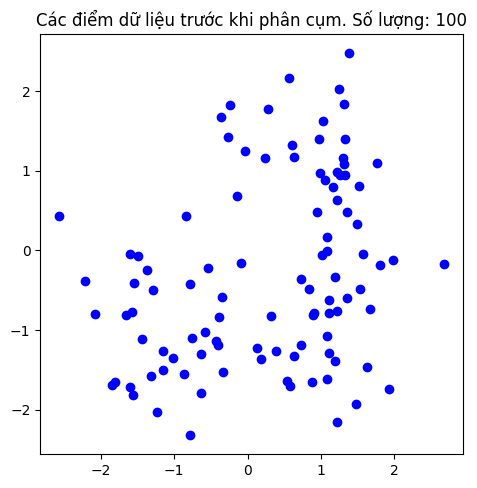

In [5]:
# Visualize
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))
plt.show()

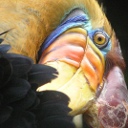

Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [10]:

path_img = 'bird_small.png'
display(Image(path_img, width=250, unconfined=True))
img = io.imread(path_img)
data_img = (img / 255.0).reshape(-1,img.shape[2])
img_shape = img.shape

print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

Kmeans library

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


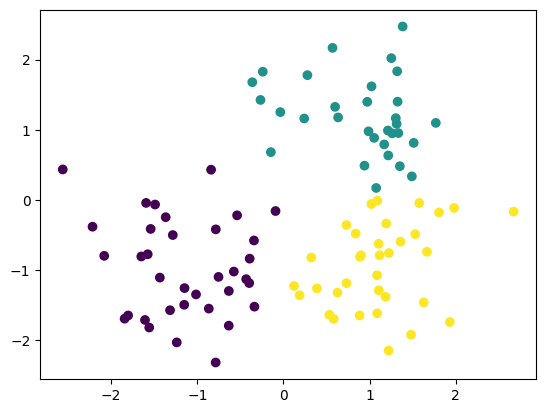

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


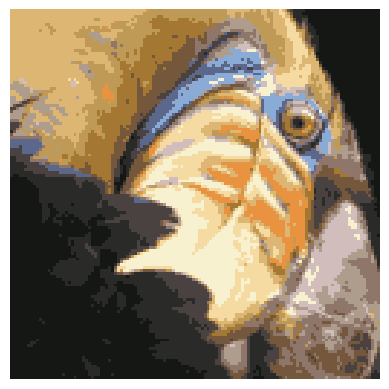

In [15]:
kmeans_sklearn = KMeans(n_clusters = 3)
kmeans_sklearn.fit(X)
labels = kmeans_sklearn.predict(X)
kmeans_display(X, labels)

K = 15
X_2D = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
kmeans = KMeans(n_clusters=K).fit(X_2D)
label = kmeans.predict(X_2D)

img4 = np.zeros_like(X_2D)
for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k]
img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()

Building Kmeans

Centers found by our algorithm:
 [[ 1.13627607 -0.65415308]
 [ 2.00853446 -0.125882  ]
 [-1.35275585 -0.14009247]
 [-0.4443895  -0.69409912]
 [ 0.43714153 -1.31426113]
 [-1.79123412 -0.77394935]
 [ 0.61185486  1.26530213]
 [-0.12866376  1.44017402]
 [-0.81406776 -1.51998762]
 [ 1.16902629  0.29122513]
 [ 1.31553646 -1.65139092]
 [ 1.10936627  2.02261099]
 [-1.56108116 -1.7461245 ]
 [-2.56134562  0.43446122]
 [ 1.29449635  1.00937391]]


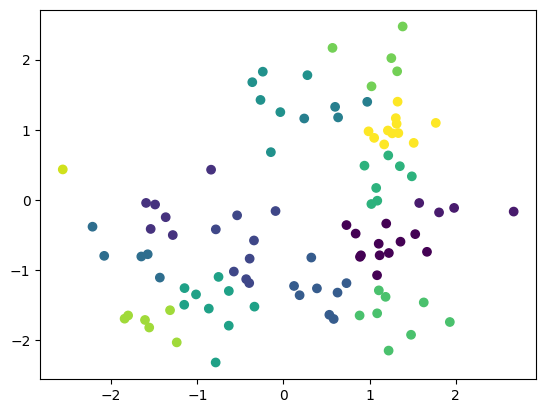

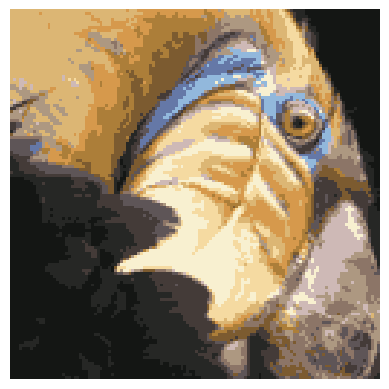

In [14]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import random

def kmeans_init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]
def kmeans_assign_labels(X, centroids):
    D = euclidean_distances(X, centroids)
    return np.argmin(D, axis = 1)
def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) ==
        set([tuple(a) for a in new_centroids]))
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0)
    return centroids

def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)
def kmeans_display(X, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()
def predict(X, centroids):
    return kmeans_assign_labels(X, centroids)

(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1])

K = 15
X_2D = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
centroids, labels, it = kmeans(X_2D, K)
labels = labels[-1]
centroids = centroids[-1]

img4 = np.zeros_like(X_2D)
for k in range(K):
    img4[labels == k] = centroids[k]

img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))

plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()